<h3>Data Description</h3>
<p>The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. All customer information that might reveal personal information is removed due to privacy concerns.</p>


<h3> Problem Statement</h3>
<p>Predict if a customer will subscribe to a term deposit or not. We are also looking what features influence a customer decision to buy and what segments should we focus on to increase more subscription</p>

In [118]:
# Imort required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score, recall_score,f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

In [119]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Read the datfile into a Pandas dataframe
df=pd.read_csv("term-deposit-marketing-2020.csv")

In [121]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [122]:
# Datatypes of the feature variables
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

Categorical Variables = job, marital, education, default,'housing',loan, contact, month

In [123]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [124]:
# Display the unique values and counts of the categorical variables
cat_col=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','y']
for i in cat_col:
    print("Column Name:",i)
    print(df[i].value_counts())
    print('')

Column Name: job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

Column Name: marital
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

Column Name: education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

Column Name: default
no     39191
yes      809
Name: default, dtype: int64

Column Name: housing
yes    24031
no     15969
Name: housing, dtype: int64

Column Name: loan
no     33070
yes     6930
Name: loan, dtype: int64

Column Name: contact
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

Column Name: month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar     

In [125]:
# Check for if any null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [126]:
# Distribution of Target variable
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

<p>The data set is very imbalanced as the number of Yes = 2896 and NO= 37104</p>

<h3> Data Analysis </h3>

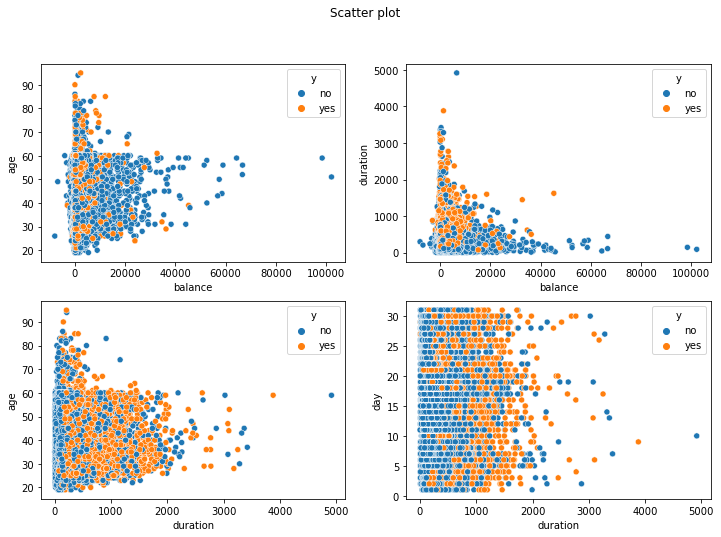

In [127]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.scatterplot(ax=ax[0,0],data=df,y='age',x='balance',hue='y')
sns.scatterplot(ax=ax[0,1],data=df,y='duration',x='balance',hue='y')
sns.scatterplot(ax=ax[1,0],data=df,y='age',x='duration',hue='y')
sns.scatterplot(ax=ax[1,1],data=df,y='day',x='duration',hue='y')
fig.suptitle("Scatter plot")
plt.show()


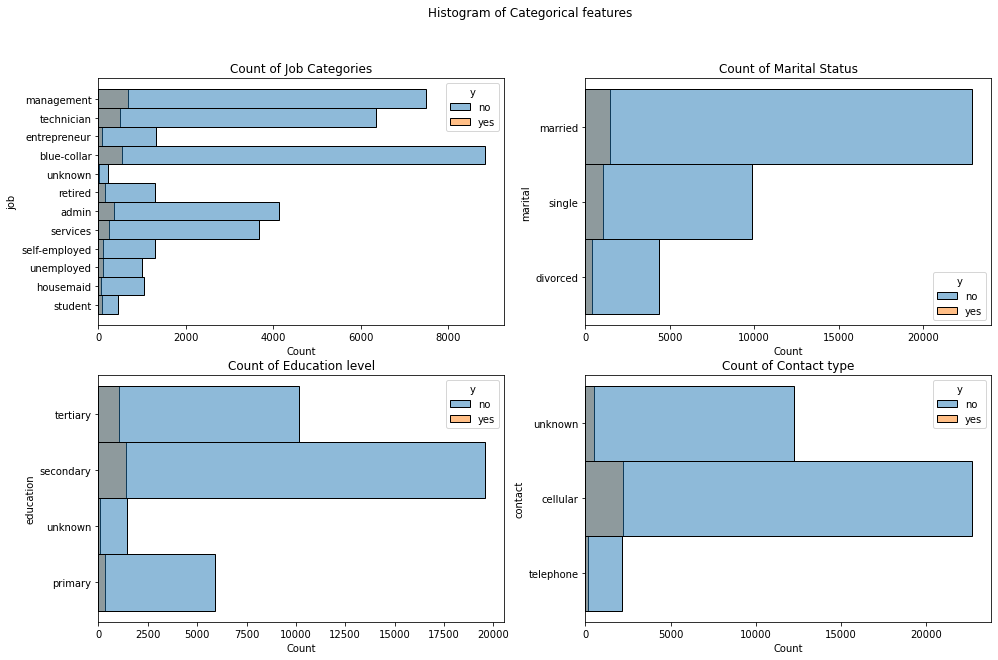

In [128]:
# Plot the various categorical features
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.histplot(ax=ax[0,0],data=df,y='job',hue='y').set(title='Count of Job Categories')
sns.histplot(ax=ax[0,1],data=df,y='marital',hue='y').set(title='Count of Marital Status')
sns.histplot(ax=ax[1,0],data=df,y='education',hue='y').set(title='Count of Education level')
sns.histplot(ax=ax[1,1],data=df,y='contact',hue='y').set(title='Count of Contact type')
fig.suptitle("Histogram of Categorical features")
plt.show()

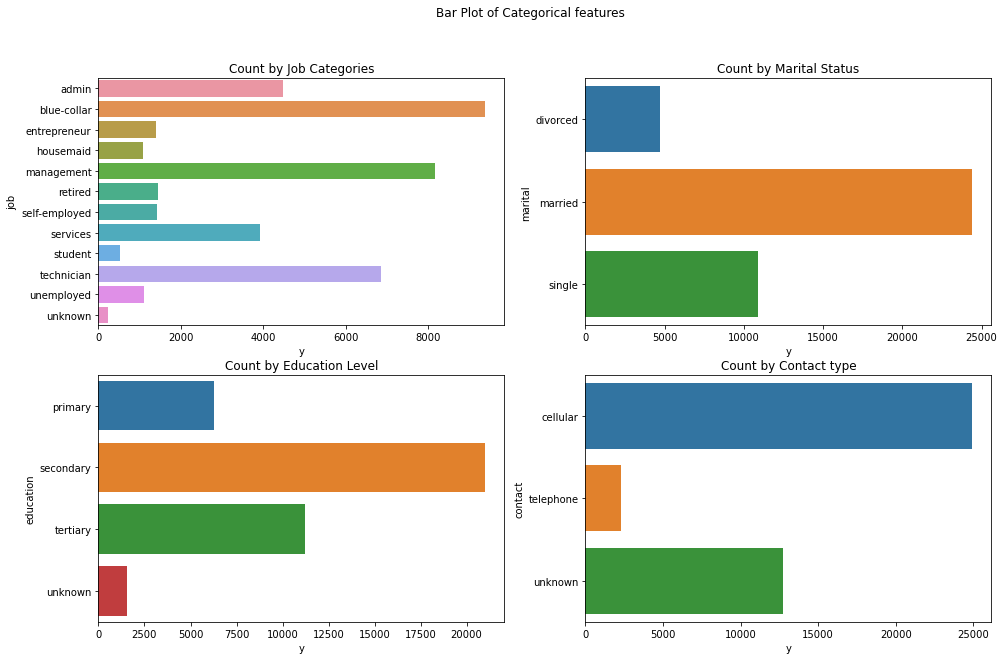

In [129]:
# sns.barplot(data=df[['y']].groupby(df['job']).count().reset_index(),y='job',x='y')
# Plot the various categorical features
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.barplot(ax=ax[0,0],data=df[['y']].groupby(df['job']).count().reset_index(),y='job',x='y').set(title='Count by Job Categories')
sns.barplot(ax=ax[0,1],data=df[['y']].groupby(df['marital']).count().reset_index(),y='marital',x='y').set(title='Count by Marital Status')
sns.barplot(ax=ax[1,0],data=df[['y']].groupby(df['education']).count().reset_index(),y='education',x='y').set(title='Count by Education Level')
sns.barplot(ax=ax[1,1],data=df[['y']].groupby(df['contact']).count().reset_index(),y='contact',x='y').set(title='Count by Contact type')
fig.suptitle("Bar Plot of Categorical features")
plt.show()


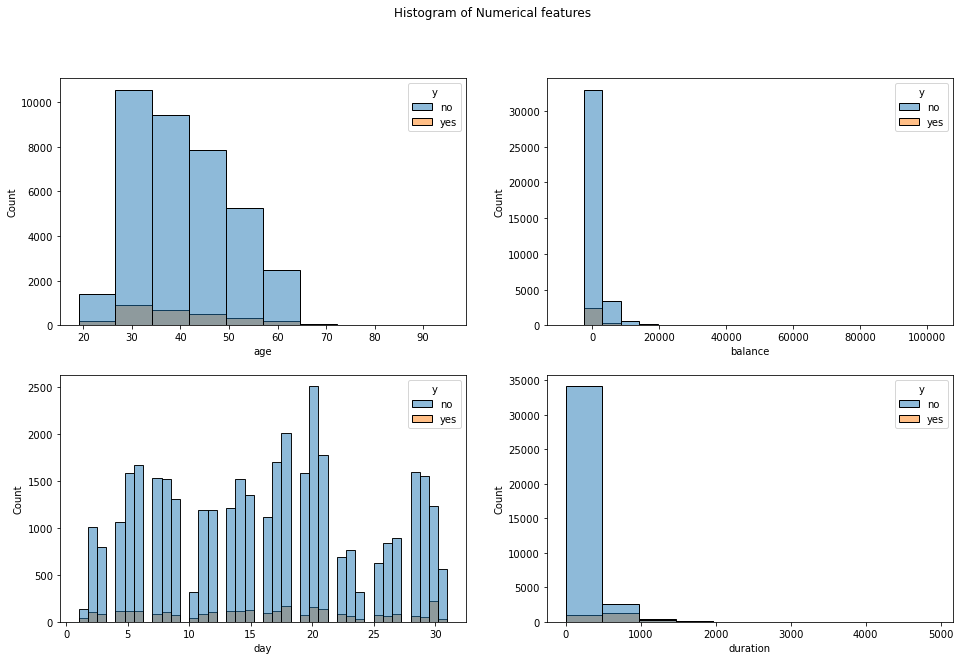

In [130]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.histplot(ax=ax[0,0],data=df,x='age',bins=10,stat='count',hue='y')
sns.histplot(ax=ax[0,1],data=df,x='balance',bins=20,hue='y')
sns.histplot(ax=ax[1,0],data=df,x='day',hue='y')
sns.histplot(ax=ax[1,1],data=df,x='duration',bins=10,hue='y')
fig.suptitle("Histogram of Numerical features")
plt.show()

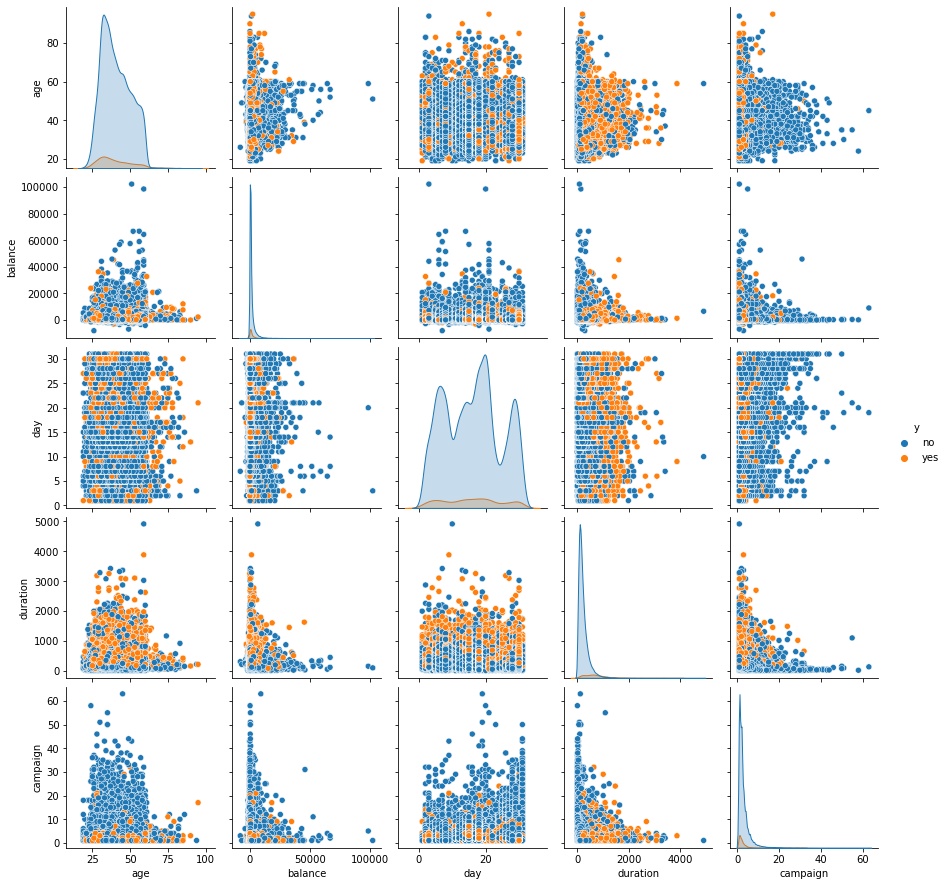

In [131]:
sns.pairplot(df,hue='y')

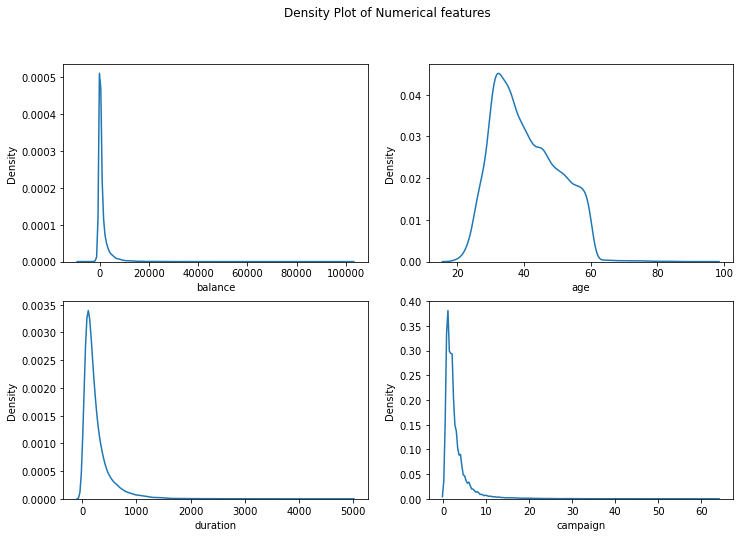

In [132]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(ax=ax[0,0],data=df,x='balance')
sns.kdeplot(ax=ax[0,1],data=df,x='age')
sns.kdeplot(ax=ax[1,0],data=df,x='duration')
sns.kdeplot(ax=ax[1,1],data=df,x='campaign')
fig.suptitle("Density Plot of Numerical features")
plt.show()


In [133]:
# Separate the Target feature 'y' and the dependent features
X=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign']]
Y=df['y']
# Convert Target variable Yes=1 and No=0
Y = Y.map({'yes': 1, 'no': 0}).astype(int)

In [134]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

<AxesSubplot:>

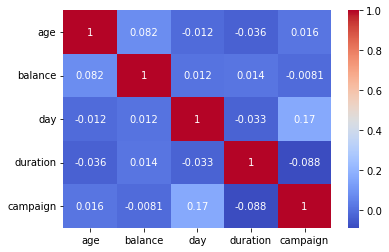

In [135]:
# Correlation matrix heat map
corr_mat=X.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

#### Observations
*  People in age group 50-60 has more balance
*  No strong correlation between Numerical features

### Model Development

##### Preprocessing
<p> Custom class TransformationPipeline used to apply preprocessing steps. StandarScaler,Imputer, PowerTransformer applied to numerical variables. Imputer and OneHotEncoding applied to categorical variables   </p>

In [141]:
# Split the dataset into Training and Testing 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [142]:
import transfxn
from transfxn import TransformationPipeline
pipe=TransformationPipeline()
X_train_scaled,X_test_scaled,feat=pipe.preprocessing(X_train, X_test)


In [143]:
# 
print("Number of Features after One Hot Encoding",len(feat))

Number of Features after One Hot Encoding 44


###### Develop model using XGBoost with deafault paramters

In [144]:
pip install -U xgboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
# XGBoost
from xgboost import XGBRFClassifier
xg= XGBRFClassifier(random_state=0)
xg.fit(X_train_scaled,y_train)
print("Training score for XGBoost",xg.score(X_train_scaled,y_train))
print("Test score for XGBoost",xg.score(X_test_scaled,y_test))
y_xgpred=xg.predict(X_test_scaled)
print(classification_report(y_test,y_xgpred))

Training score for XGBoost 0.939
Test score for XGBoost 0.93625
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7433
           1       0.55      0.51      0.53       567

    accuracy                           0.94      8000
   macro avg       0.76      0.74      0.75      8000
weighted avg       0.93      0.94      0.94      8000



ROC Score 0.7400585738179352


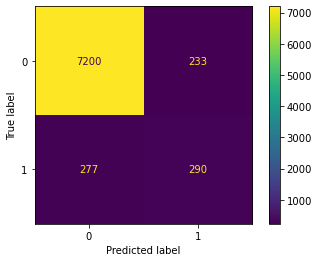

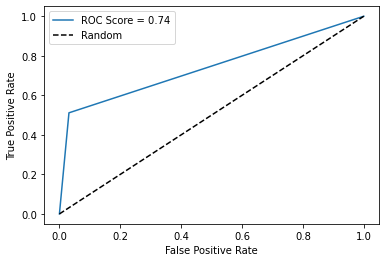

In [146]:
# confusion Matrix
cm=confusion_matrix(y_test,y_xgpred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=xg.classes_)
cm_plot.plot()

# ROC Curve
roc_auc=roc_auc_score(y_test,y_xgpred)
print("ROC Score",roc_auc)
fpr,tpr,threshold = roc_curve(y_test,y_xgpred)
plt.figure()
plt.plot(fpr,tpr,label='ROC Score = %0.2f' % roc_auc)
plt.plot((0,1),(0,1),"--",color='black',label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### Featuere Engineering with XGBoost

In [147]:
xg.feature_importances_

array([0.01611407, 0.00689399, 0.01145309, 0.19121976, 0.0091899 ,
       0.00810349, 0.00796911, 0.        , 0.00921573, 0.00457749,
       0.00935588, 0.00516755, 0.00505756, 0.00769739, 0.00810695,
       0.00908405, 0.        , 0.01010071, 0.01307027, 0.00680315,
       0.00588781, 0.00568662, 0.00589958, 0.0101807 , 0.00496634,
       0.00526705, 0.08525539, 0.07453379, 0.00647707, 0.00641681,
       0.0319525 , 0.00562182, 0.02716227, 0.06170972, 0.01354385,
       0.        , 0.01659748, 0.00897534, 0.00776487, 0.01101306,
       0.16428167, 0.01957551, 0.00860976, 0.07344088], dtype=float32)

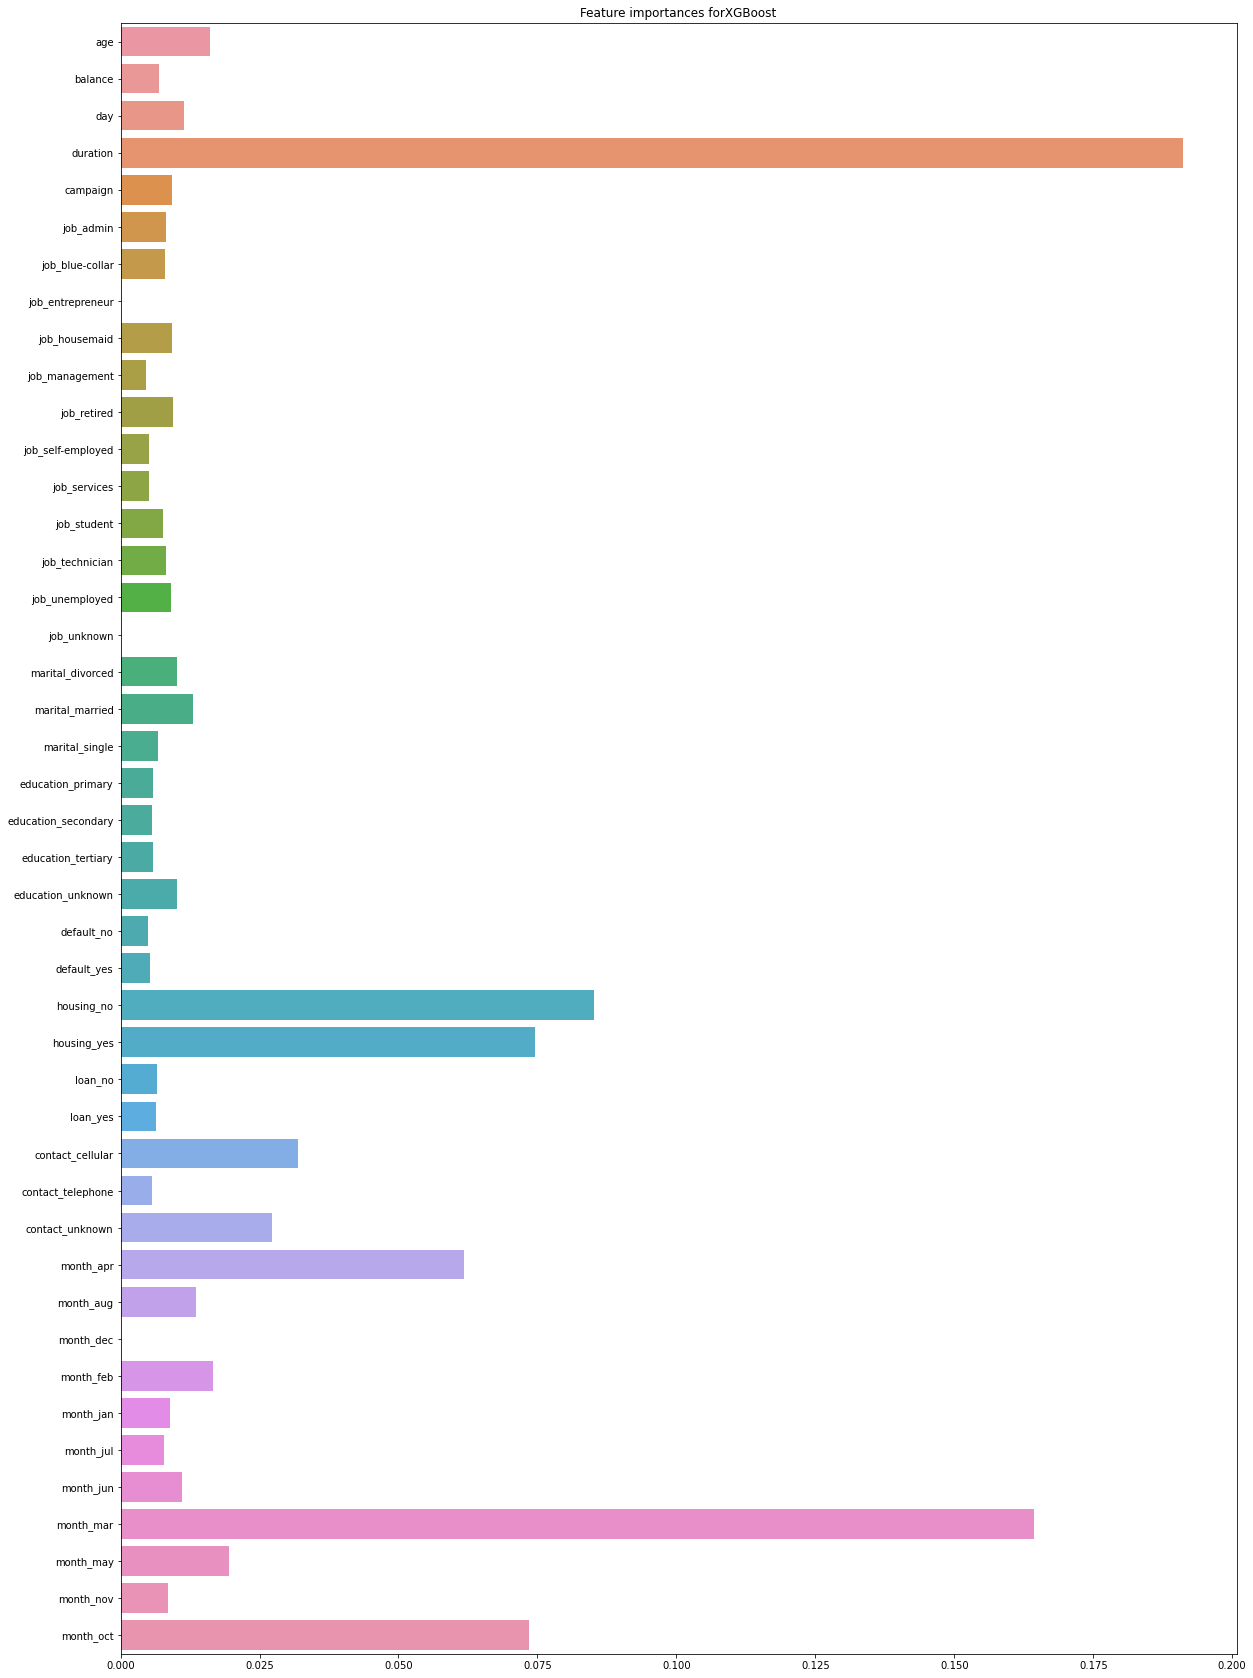

In [148]:
from matplotlib import pyplot as plt
f_plot=pd.DataFrame(xg.feature_importances_.reshape(1,44),columns=feat)
plt.figure(figsize=(20,30))

sns.barplot(data=f_plot,orient='h').set(title="Feature importances forXGBoost")
plt.show()

In [149]:
# Drop the less important features
Xf_train=np.delete(X_train_scaled,[0,  1,  2, 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32,
       34, 35, 36, 37, 38, 39,41,42],1)
Xf_test=np.delete(X_test_scaled,[0,  1,  2, 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32,
       34, 35, 36, 37, 38, 39,41,42],1)



In [150]:
# Shaped after dropping features
Xf_train.shape

(32000, 6)

In [151]:
xgf= XGBRFClassifier(random_state=0)
xgf.fit(Xf_train,y_train)
print("Training score for XGBoost",xgf.score(Xf_train,y_train))
print("Test score for XGBoost",xgf.score(Xf_test,y_test))
y_xgfpred=xgf.predict(Xf_test)
print(classification_report(y_test,y_xgfpred))

Training score for XGBoost 0.9329375
Test score for XGBoost 0.932625
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7433
           1       0.53      0.50      0.51       567

    accuracy                           0.93      8000
   macro avg       0.74      0.73      0.74      8000
weighted avg       0.93      0.93      0.93      8000



ROC Score 0.7340349805706997


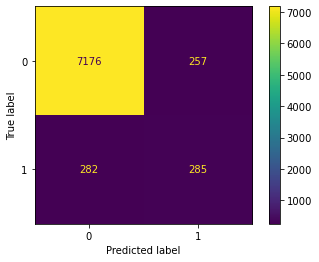

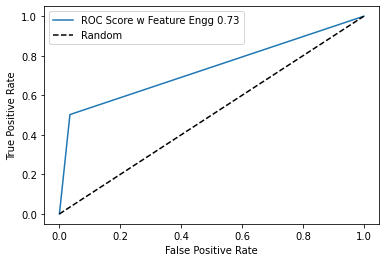

In [152]:
# confusion Matrix
cm=confusion_matrix(y_test,y_xgfpred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=xgf.classes_)
cm_plot.plot()

# ROC Curve
roc_auc=roc_auc_score(y_test,y_xgfpred)
print("ROC Score",roc_auc)
fpr,tpr,threshold = roc_curve(y_test,y_xgfpred)
plt.figure()
plt.plot(fpr,tpr,label='ROC Score w Feature Engg %.2f' % roc_auc)
plt.plot((0,1),(0,1),"--",color='black',label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



##### Class weights adjustment for XGBoost
<p> Adjust the class weights for model with assigning more weightage to minority class '1'</p>

In [153]:
# XGBoost
from xgboost import XGBRFClassifier
pos_w=(Y.value_counts()[0]/Y.value_counts()[1]).astype("float64")
pos_w
xgw= XGBRFClassifier(random_state=0,scale_pos_weight = pos_w)
xgw.fit(X_train_scaled,y_train)
print("Training score for XGBoost",xgw.score(X_train_scaled,y_train))
print("Test score for XGBoost",xgw.score(X_test_scaled,y_test))
y_xgwpred=xgw.predict(X_test_scaled)
print(classification_report(y_test,y_xgwpred))

Training score for XGBoost 0.87965625
Test score for XGBoost 0.8825
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7433
           1       0.36      0.89      0.52       567

    accuracy                           0.88      8000
   macro avg       0.68      0.88      0.73      8000
weighted avg       0.95      0.88      0.90      8000



ROC Score 0.8846362009732565


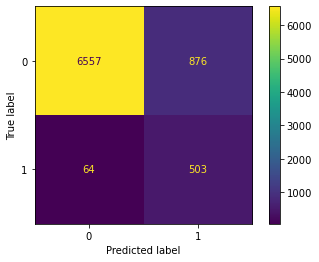

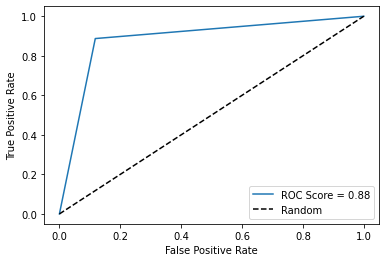

In [154]:
# confusion Matrix
cm=confusion_matrix(y_test,y_xgwpred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=xgw.classes_)
cm_plot.plot()

# ROC Curve
roc_auc=roc_auc_score(y_test,y_xgwpred)
print("ROC Score",roc_auc)
fpr,tpr,threshold = roc_curve(y_test,y_xgwpred)
plt.figure()
plt.plot(fpr,tpr,label='ROC Score = %0.2f' % roc_auc)
plt.plot((0,1),(0,1),"--",color='black',label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### SMOTE for Upsampling the data

In [155]:
! pip install -U imblearn
! pip install -U threadpoolctl

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0,sampling_strategy='minority',k_neighbors=5,n_jobs=-1)
X_s,y_s = sm.fit_resample(X_train_scaled,y_train)

In [157]:
y_s.value_counts()

0    29671
1    29671
Name: y, dtype: int64

<p> Apply various models on the balanced data set </p>

In [158]:
# XGBoost model for the balanced data set
from xgboost import XGBRFClassifier
xgs= XGBRFClassifier(random_state=0)
xgs.fit(X_s,y_s)
print("Training score XG with balanced set",xgs.score(X_s,y_s))
print("test Score XG with balanced set",xgs.score(X_test_scaled,y_test))
y_xgspred=xgs.predict(X_test_scaled)
print(classification_report(y_test,y_xgspred))

Training score XG with balanced set 0.90232887331064
test Score XG with balanced set 0.89575
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7433
           1       0.39      0.84      0.53       567

    accuracy                           0.90      8000
   macro avg       0.69      0.87      0.74      8000
weighted avg       0.94      0.90      0.91      8000



ROC Score 0.8714023999462809


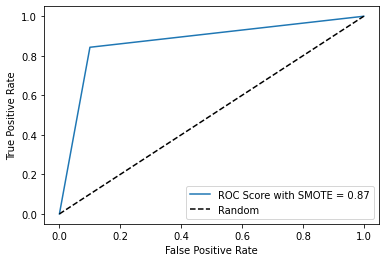

In [159]:
roc_auc=roc_auc_score(y_test,y_xgspred)
print("ROC Score",roc_auc)
fpr,tpr,threshold = roc_curve(y_test,y_xgspred)
plt.figure()
plt.plot(fpr,tpr,label='ROC Score with SMOTE = %0.2f' % roc_auc)
plt.plot((0,1),(0,1),"--",color='black',label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



#### Upsampling using ADASYN 

In [160]:
# Apply XGBoost on the upsampled data set
from imblearn.over_sampling import ADASYN
smk= ADASYN(n_neighbors=5,random_state=0,n_jobs=-1)
X_k,y_k=smk.fit_resample(X_train_scaled,y_train)
xga=XGBRFClassifier()
xga.fit(X_k,y_k)
print("Training score RF with ADASYN", xga.score(X_k,y_k))
print("test score RF with ADASYN",xga.score(X_test_scaled,y_test))
y_xgapred=xga.predict(X_test_scaled)
print(classification_report(y_test,y_xgapred))


Training score RF with ADASYN 0.8968355928192299
test score RF with ADASYN 0.88875
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      7433
           1       0.38      0.86      0.52       567

    accuracy                           0.89      8000
   macro avg       0.68      0.87      0.73      8000
weighted avg       0.94      0.89      0.91      8000



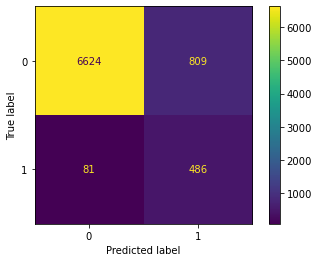

In [161]:
cm=confusion_matrix(y_test,y_xgapred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=xga.classes_)
cm_plot.plot()

ROC Score 0.874151947877227


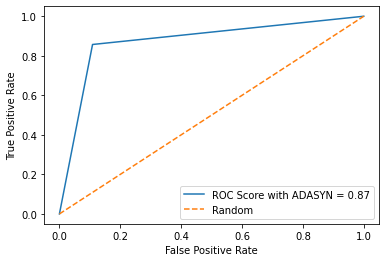

In [162]:
roc_auc=roc_auc_score(y_test,y_xgapred)
print("ROC Score",roc_auc)
fpr,tpr,threshold = roc_curve(y_test,y_xgapred)
plt.figure()
plt.plot(fpr,tpr,label='ROC Score with ADASYN = %0.2f' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot((0,1),(0,1),"--",label="Random")
plt.legend()
plt.show()

#### ROC plot for all the models

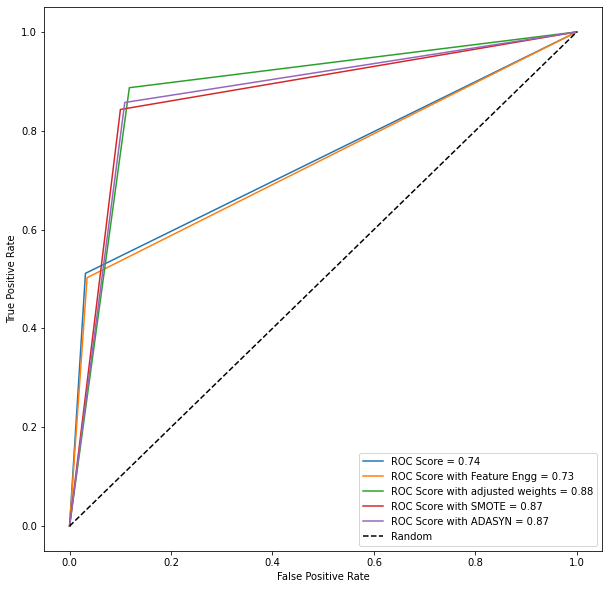

In [164]:
# Plot ROC curves together for model with feature engineering, SMOTE, ADASYN
roc_auc0=roc_auc_score(y_test,y_xgpred)
roc_auc1=roc_auc_score(y_test,y_xgfpred)
roc_auc2=roc_auc_score(y_test,y_xgwpred)
roc_auc3=roc_auc_score(y_test,y_xgspred)
roc_auc4=roc_auc_score(y_test,y_xgapred)
fpr0,tpr0,threshold = roc_curve(y_test,y_xgpred)
fpr1,tpr1,threshold = roc_curve(y_test,y_xgfpred)
fpr2,tpr2,threshold = roc_curve(y_test,y_xgwpred)
fpr3,tpr3,threshold = roc_curve(y_test,y_xgspred)
fpr4,tpr4,threshold = roc_curve(y_test,y_xgapred)
plt.figure(figsize=(10,10))
plt.plot(fpr0,tpr0,label='ROC Score = %0.2f' % roc_auc0)
plt.plot(fpr1,tpr1,label='ROC Score with Feature Engg = %0.2f' % roc_auc1)
plt.plot(fpr2,tpr2,label='ROC Score with adjusted weights = %0.2f' % roc_auc2)
plt.plot(fpr3,tpr3,label='ROC Score with SMOTE = %0.2f' % roc_auc3)
plt.plot(fpr4,tpr4,label='ROC Score with ADASYN = %0.2f' % roc_auc4)
plt.plot((0,1),(0,1),"--",color='black',label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Conclusion
<p>The model achieved an ROC score of 0.88 using XGBoost with adjusted weights. Various techniques were used XGBoost , Feature enginerring , Class Weights adjustment, SMOTE and ADASYN to upsample the imbalanced data. The data was highly imbalanced with more NO than YES , upsampling was applied to increase the YES samples and Class Weights adjustments was applied to add more weight to minority YES </p>